Notebook from Kaggle/idk

Forgot where to get this...

Using VADER to label the sentiment into 3 categories: [Positive, Neutral, Negative]

Then it uses bayen network to create a model for classifying them

* **Libraries required**

In [2]:
#Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

* **Read data**

In [4]:
data = pd.read_csv('dataset.csv')
data1 = data
data1.head(10)

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
5,10,Counter-Strike,"No r8 revolver, 10/10 will play again.",1,1
6,10,Counter-Strike,Still better than Call of Duty: Ghosts...,1,1
7,10,Counter-Strike,"cant buy skins, cases, keys, stickers - gaben ...",1,1
8,10,Counter-Strike,"Counter-Strike: Ok, after 9 years of unlimited...",1,1
9,10,Counter-Strike,Every server is spanish or french. I can now f...,1,0


In [5]:
# turned all rows of "review_text" to str
data1['review_text'] = data1['review_text'].apply(str, 1)
data1.head(10)

/var/folders/hm/n8540hpn7xd1f0pw3_qnsp4r0000gn/T/ipykernel_97695/3084776513.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  data1['review_text'] = data1['review_text'].apply(str, 1)


,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
5,10,Counter-Strike,"No r8 revolver, 10/10 will play again.",1,1
6,10,Counter-Strike,Still better than Call of Duty: Ghosts...,1,1
7,10,Counter-Strike,"cant buy skins, cases, keys, stickers - gaben ...",1,1
8,10,Counter-Strike,"Counter-Strike: Ok, after 9 years of unlimited...",1,1
9,10,Counter-Strike,Every server is spanish or french. I can now f...,1,0


In [6]:
data1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        int64 
 1   app_name      object
 2   review_text   object
 3   review_score  int64 
 4   review_votes  int64 
dtypes: int64(3), object(2)
memory usage: 244.8+ MB


In [7]:
# leave only 1% of entries (~64K) for testing on here
n_remove = int(len(data1.index) * 0.99)
data1_remaining = data1.sample(n=len(data1)-n_remove).sort_index()

* **Data labelling**

The data labelling is using NLTK SentimentIntensityAnalyzer() function, which is based on VADER sentiment analysis tools.

Link: https://www.nltk.org/api/nltk.sentiment.vader.html

The tool is based on "Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014."

Possible improvements: instead of using rule-based model, can we apply LLM to do labelling for us?

In [8]:
# Blog: https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data1_remaining["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1_remaining["review_text"]]
data1_remaining["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1_remaining["review_text"]]
data1_remaining["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1_remaining["review_text"]]
data1_remaining['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data1_remaining["review_text"]]
score = data1_remaining["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data1_remaining["Sentiment"] = sentiment
data1_remaining.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/michaelcheng/nltk_data...


,app_id,app_name,review_text,review_score,review_votes,Positive,Negative,Neutral,Compound,Sentiment
46,10,Counter-Strike,With only ~4000 hours of playtime (plus a few ...,1,1,0.061,0.130,0.809,-0.2662,Negative
382,10,Counter-Strike,It's simple. Terrorist x CTs Few minutes to co...,1,0,0.328,0.126,0.546,0.9615,Positive
533,10,Counter-Strike,My name is Commander Shepard and this game tha...,1,0,0.000,0.220,0.780,-0.4767,Negative
588,10,Counter-Strike,nan,1,0,0.000,0.000,1.000,0.0000,Neutral
597,10,Counter-Strike,.,1,0,0.000,0.000,0.000,0.0000,Neutral


* **Final data**

In [9]:
data2=data1_remaining.drop(['Positive','Negative','Neutral','Compound'],axis=1)
data2.head()

,app_id,app_name,review_text,review_score,review_votes,Sentiment
46,10,Counter-Strike,With only ~4000 hours of playtime (plus a few ...,1,1,Negative
382,10,Counter-Strike,It's simple. Terrorist x CTs Few minutes to co...,1,0,Positive
533,10,Counter-Strike,My name is Commander Shepard and this game tha...,1,0,Negative
588,10,Counter-Strike,nan,1,0,Neutral
597,10,Counter-Strike,.,1,0,Neutral


* **Data transformation**

In [11]:
# nltk.download('stopwords')
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer() 
snowball_stemer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelcheng/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
def text_processing(text):   
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)
    
    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    
    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove special characters from text
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    
    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])
    
    # lemmatizer using WordNetLemmatizer from nltk package
    # lematize to to normalize words and reduce inflectional forms to a common base form. 
    # The resulting base form, or lemma, represents the canonical or dictionary form of a word. 
    # For example, the lemma of the words "running," "runs," and "ran" is "run."
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text

In [18]:
# uncomment these lines to download necessary resources for the first time

# nltk.download('punkt')
# nltk.download('omw-1.4')
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelcheng/nltk_data...


True

In [19]:
data_copy = data2.copy()
data_copy.review_text = data_copy.review_text.apply(lambda text: text_processing(text))

In [20]:
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [22]:
processed_data = {
    'Review':data_copy.review_text,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,Review,Sentiment
46,4000 hour playtime plus thousand prior steam m...,0
382,simple terrorist x ct minute complete objectiv...,2
533,name commander shepard game ruined grade,0
588,nan,1
597,,1


In [23]:
processed_data['Sentiment'].value_counts()

Sentiment
2    38714
1    15251
0    10207
Name: count, dtype: int64

* **Balancing data**

In [30]:
max_sentiment_idx = processed_data['Sentiment'].value_counts().idxmax()
max_sentiment_count = max(processed_data['Sentiment'].value_counts())
print(max_sentiment_idx, ', count:', max_sentiment_count)

2 , count: 38714


In [31]:
df_neutral = processed_data[(processed_data['Sentiment']==1)] 
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

if max_sentiment_idx == 0:
    df_neutral_upsampled = resample(df_neutral, 
                                 replace=True,    
                                 n_samples=max_sentiment_count, 
                                 random_state=42)

    df_positive_upsampled = resample(df_positive, 
                                 replace=True,    
                                 n_samples=max_sentiment_count, 
                                 random_state=42)
    
    final_data = pd.concat([df_negative,df_neutral_upsampled,df_positive_upsampled])

elif max_sentiment_idx == 1:
    df_positive_upsampled = resample(df_positive, 
                                 replace=True,    
                                 n_samples=max_sentiment_count, 
                                 random_state=42)

    df_negative_upsampled = resample(df_negative, 
                                    replace=True,    
                                    n_samples=max_sentiment_count, 
                                    random_state=42)

    final_data = pd.concat([df_negative_upsampled,df_neutral,df_positive_upsampled])


elif max_sentiment_idx == 2:
    # upsample minority classes
    df_negative_upsampled = resample(df_negative, 
                                    replace=True,    
                                    n_samples=max_sentiment_count, 
                                    random_state=42)  

    df_neutral_upsampled = resample(df_neutral, 
                                    replace=True,    
                                    n_samples=max_sentiment_count, 
                                    random_state=42) 

    # Concatenate the upsampled dataframes with the neutral dataframe
    final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])



In [32]:
final_data['Sentiment'].value_counts()

Sentiment
0    38714
1    38714
2    38714
Name: count, dtype: int64

In [33]:
corpus = []
for sentence in final_data['Review']:
    corpus.append(sentence)
corpus[0:5]

['came high hope game almost requires strategy step 1 get star step 2 kill star rinse repeat game',
 'definitely worst game ezio trilogy pro constantinople nice atmospheric cappadocia bunch side mission collectible always con main story mission extremely scriptedcinematicepic give almost freedom make boring many quick time event press button fail mission type fake difficulty rideable horse interesting character explorable location dont get outside animus demond story told mediocre platforming puzzle game unlock collecting thing constantinople dlc worth opinion everything give notoriety find herald bribe leave area come back bribe three time youve killed many soldier renovated shop janissary everywhere gun resist counter kill make swordfighting tedious challenging unless use bomb assassin much focus new mechanic bomb crafting jumping building parachute almost never work ezio invariably find bale hay jump even tell jump another direction unnecessary delay open map menu money unbalanced c

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

* **Machine learning model**

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

* **Evaluation**

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4006,  2564,  4961],
       [  110, 10997,   614],
       [ 1380,  3123,  7088]])

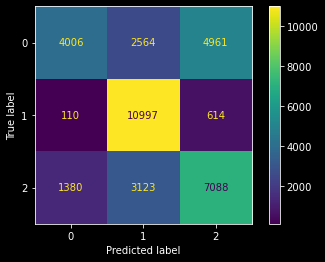

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ticks = ['negative', 'netural', 'positive']

plt.style.use('dark_background')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=classifier.classes_)
disp.plot()

In [43]:
nb_score = accuracy_score(y_test, y_pred)
print('accuracy',nb_score)

accuracy 0.6340154406911
